In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## Prepare Data

In [ ]:
# Load the Data
df = pd.read_excel('opentable_data.xlsx', sheet_name='data')
df_copy = pd.read_excel('opentable_data.xlsx', sheet_name='data')

df.head()

,Rid,City,Booked Reservations (Last 30 Days),5 Star Reviews (Last 30 Days),Direct Searches (Last 30 Days),Notify Me Alerts Set (Last 30 Days),Saved in Profile (Last 30 Days),Baseline Booked Reservations,Baseline 5 Star Reviews,Baseline Direct Searches,Baseline Notify Me Alerts Set,Baseline Saved in Profile
0,10001440,C2,1,NaN,36.0,NaN,1.0,91.0,5.0,153.0,1.0,2.0
1,1001130,C1,182,2.0,15.0,NaN,2.0,230.0,5.0,36.0,NaN,NaN
2,1001700,C1,70,3.0,36.0,NaN,2.0,103.0,7.0,39.0,NaN,1.0
3,1002190,C2,81,5.0,53.0,NaN,1.0,70.0,7.0,68.0,NaN,5.0
4,1002240,C1,102,2.0,6.0,NaN,3.0,111.0,NaN,20.0,NaN,1.0


In [ ]:
# Analyze the data
# Count Rids by City
city_counts = df.groupby('City')['Rid'].count().reset_index()
city_counts.rename(columns={'Rid': 'Number of Restaurants'}, inplace=True)
print("Number of Restaurants per City:")
display(city_counts)

# Summary statistics at dataset level
print("\nSummary statistics at dataset level:")

display(df.describe(include='all'))

# Summary statistics by City
print("\nSummary statistics by City:")
display(df.groupby('City').describe(include='all'))

Number of Restaurants per City:


,City,Number of Restaurants
0,C1,2253
1,C2,389



Summary statistics at dataset level:


,Rid,City,Booked Reservations (Last 30 Days),5 Star Reviews (Last 30 Days),Direct Searches (Last 30 Days),Notify Me Alerts Set (Last 30 Days),Saved in Profile (Last 30 Days),Baseline Booked Reservations,Baseline 5 Star Reviews,Baseline Direct Searches,Baseline Notify Me Alerts Set,Baseline Saved in Profile
count,2.642000e+03,2642,2642.000000,2028.000000,2622.000000,734.000000,1986.000000,2550.000000,2038.000000,2524.000000,815.000000,1974.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.160261e+08,NaN,361.274792,13.849112,266.755149,24.286104,8.426989,331.212157,14.999509,237.219889,25.279755,8.135765
std,1.389606e+09,NaN,989.627819,23.519212,910.200720,218.118626,17.852995,576.890750,25.148191,794.493542,254.473823,12.141412
min,4.000000e+01,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.047510e+06,NaN,25.000000,2.000000,27.000000,1.000000,2.000000,31.000000,2.000000,25.000000,1.000000,2.000000
50%,2.068095e+06,NaN,108.000000,6.000000,75.000000,2.000000,4.000000,122.000000,6.000000,73.000000,2.000000,4.000000
75%,3.233775e+06,NaN,375.750000,14.250000,210.000000,6.000000,9.000000,380.000000,16.000000,210.000000,7.000000,9.000000



Summary statistics by City:


Rid                                                              \
       count          mean           std      min        25%         50%   
City                                                                       
C1    2253.0  4.016189e+07  3.030017e+08  40490.0  1057410.0   1997970.0   
C2     389.0  1.234592e+09  3.375079e+09     40.0   701830.0  10660360.0   

                               Booked Reservations (Last 30 Days)              \
             75%           max                              count        mean   
City                                                                            
C1     2915340.0  3.503194e+09                             2253.0  328.587661   
C2    13674790.0  1.372895e+10                              389.0  550.591260   

                                                     \
              std  min   25%    50%    75%      max   
City                                                  
C1     780.204004  1.0  20.0   90.0  338.0  16546.0   
C2    1758.129440  1.0  81.0  225.0  556.0  32396.0   

     5 Star Reviews (Last 30 Days)                                         \
                             count       mean        std  min   25%   50%   
City                                                                        
C1                          1680.0  11.536310  18.496523  1.0  2.00   5.0   
C2                           348.0  25.014368  37.748253  1.0  5.75  13.0   

                   Direct Searches (Last 30 Days)                           \
        75%    max                          count        mean          std   
City                                                                         
C1    12.25  202.0                         2235.0  191.714094   488.742227   
C2    29.00  421.0                          387.0  700.131783  2005.500372   

                                       Notify Me Alerts Set (Last 30 Days)  \
      min   25%    50%    75%      max                               count   
City                                                                         
C1    1.0  23.0   61.0  159.0   8128.0                               554.0   
C2    8.0  99.5  225.0  630.0  33347.0                               180.0   

                                                           \
           mean         std  min  25%  50%    75%     max   
City                                                        
C1    10.261733   41.753844  1.0  1.0  2.0   5.00   732.0   
C2    67.450000  432.380694  1.0  1.0  4.0  14.25  5506.0   

     Saved in Profile (Last 30 Days)                                       \
                               count       mean        std  min  25%  50%   
City                                                                        
C1                            1632.0   6.268382   8.236929  1.0  1.0  3.0   
C2                             354.0  18.378531  36.850409  1.0  3.0  6.5   

                  Baseline Booked Reservations                                \
       75%    max                         count        mean         std  min   
City                                                                           
C1     8.0   97.0                        2175.0  315.061609  574.115103  1.0   
C2    15.0  275.0                         375.0  424.885333  584.763625  1.0   

                                 Baseline 5 Star Reviews             \
       25%    50%    75%     max                   count       mean   
City                                                                  
C1    24.5  104.0  351.0  5694.0                  1692.0  12.550827   
C2    84.0  214.0  533.0  5702.0                   346.0  26.973988   

                                             Baseline Direct Searches   \
            std  min  25%   50%   75%    max                     count   
City                                                                     
C1    20.120404  1.0  2.0   5.0  14.0  197.0                    2150.0   
C2    39.706779  1.0  6.0  15.0  

In [ ]:
df.columns

Index(['Rid', 'City', 'Booked Reservations (Last 30 Days)',
       '5 Star Reviews (Last 30 Days)', 'Direct Searches (Last 30 Days)',
       'Notify Me Alerts Set (Last 30 Days)',
       'Saved in Profile (Last 30 Days)', 'Baseline Booked Reservations ',
       'Baseline 5 Star Reviews', 'Baseline Direct Searches ',
       'Baseline Notify Me Alerts Set', 'Baseline Saved in Profile'],
      dtype='object')

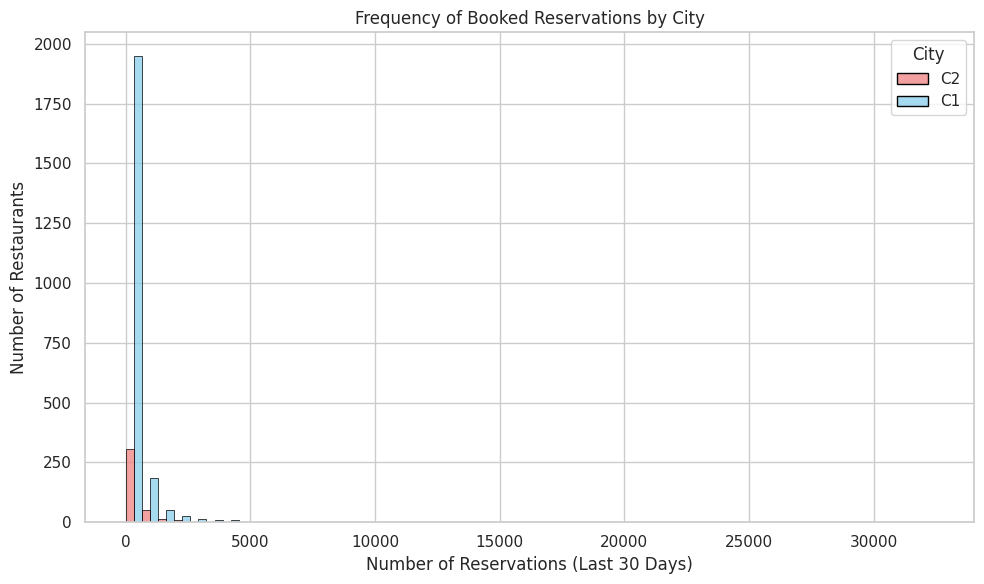

In [ ]:
df['Booked Reservations (Last 30 Days)'] = pd.to_numeric(df['Booked Reservations (Last 30 Days)'], errors='coerce')
df_plot = df[['City', 'Booked Reservations (Last 30 Days)']].dropna()

# Plot side-by-side histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_plot,
    x='Booked Reservations (Last 30 Days)',
    hue='City',
    multiple='dodge',
    bins=50,
    palette={'C1': 'skyblue', 'C2': 'lightcoral'},
    edgecolor='black'
)

plt.title('Frequency of Booked Reservations by City')
plt.xlabel('Number of Reservations (Last 30 Days)')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import RobustScaler

def clean_and_rename_columns(x):
  column_mapping = {
            'Booked Reservations (Last 30 Days)': 'reservations_recent',
            '5 Star Reviews (Last 30 Days)': 'reviews_recent',
            'Direct Searches (Last 30 Days)': 'searches_recent',
            'Notify Me Alerts Set (Last 30 Days)': 'alerts_recent',
            'Saved in Profile (Last 30 Days)': 'saves_recent',
            'Baseline Booked Reservations ': 'reservations_baseline',
            'Baseline 5 Star Reviews': 'reviews_baseline',
            'Baseline Direct Searches ': 'searches_baseline',
            'Baseline Notify Me Alerts Set': 'alerts_baseline',
            'Baseline Saved in Profile': 'saves_baseline'
        }
  x = x.rename(columns=column_mapping)

  engagement_metrics = ['alerts_recent', 'alerts_baseline', 'saves_recent', 'saves_baseline']
  core_metrics = ['reservations_recent','reservations_baseline','reviews_recent','reviews_baseline','searches_recent','searches_baseline']

  for col in engagement_metrics:
      if col in x.columns:
          x[col] = x[col].fillna(0)

  x['has_core_data'] = True
  for col in core_metrics:
      if col in x.columns:
          x['has_core_data'] = x['has_core_data'] & x[col].notna()

  return x

df_clean = clean_and_rename_columns(df)

In [ ]:
METRICS_TO_CAP = [
    'reservations_recent', 'reservations_baseline',
    'reviews_recent', 'reviews_baseline',
    'searches_recent', 'searches_baseline',
    'alerts_recent', 'alerts_baseline',
    'saves_recent', 'saves_baseline'
]

def calculate_cap(series):
    """Return the 95th percentile value for capping."""
    return series.quantile(0.95)

def cap_outliers(df):
    """Apply capping to all relevant metrics, add columns *_capped."""
    print("Outlier Treatment")
    df = df.copy()
    outlier_summary = {}

    for metric in METRICS_TO_CAP:
        if metric in df.columns and df[metric].notna().sum() > 0:
            cap_value = calculate_cap(df[metric])
            original_max = df[metric].max()
            df[f'{metric}_capped'] = df[metric].clip(lower=1, upper=cap_value)
            capped_count = (df[metric] > cap_value).sum()
            outlier_summary[metric] = {
                'original_max': original_max,
                'capped_at': cap_value,
                'restaurants_capped': capped_count
            }
        else:
            df[f'{metric}_capped'] = 0.0
            print(f"   Warning: {metric} not found, using zeros for capped version")

    print("Outlier Treatment Summary:")
    for metric, summary in outlier_summary.items():
        if summary['restaurants_capped'] > 0:
            print(f"     • {metric}: {summary['restaurants_capped']} restaurants capped at {summary['capped_at']:.0f}")

    return df, outlier_summary

df_capped, summary = cap_outliers(df_clean)

Outlier Treatment
Outlier Treatment Summary:
     • reservations_recent: 133 restaurants capped at 1453
     • reservations_baseline: 128 restaurants capped at 1365
     • reviews_recent: 101 restaurants capped at 54
     • reviews_baseline: 99 restaurants capped at 60
     • searches_recent: 132 restaurants capped at 1029
     • searches_baseline: 127 restaurants capped at 902
     • alerts_recent: 127 restaurants capped at 10
     • alerts_baseline: 127 restaurants capped at 13
     • saves_recent: 132 restaurants capped at 23
     • saves_baseline: 131 restaurants capped at 25


In [ ]:
METRICS = ['reservations', 'reviews', 'searches', 'alerts', 'saves']

def calculate_effective_baseline(df, baseline_col):
  """Prevent tiny baselines from inflating growth."""
  # For each city, the 10th percentile or 1, whichever is higher.
  city_min = df.groupby('City')[baseline_col].transform(lambda x: max(x.quantile(0.10), 1))
  return np.maximum(df[baseline_col], city_min)

def calculate_growth_rate(recent, baseline):
  """(recent - baseline) / baseline, capped (-80%, +300%)."""
  growth = (recent - baseline) / baseline
  return np.clip(growth, -0.8, 3.0)

def calculate_scale_adjustment(df, baseline_col):
  """Returns scale adjustment factor to dampen small baseline artifacts."""
  city_median = df.groupby('City')[baseline_col].transform('median')
  return np.minimum(1.0, df[baseline_col] / city_median)

def calculate_all_growth_metrics(df):
  """Calculate growth and adjusted growth metrics for each metric."""
  print("Growth Metric Calculation")
  df = df.copy()
  for metric in METRICS:
      recent_col = f"{metric}_recent_capped"
      baseline_col = f"{metric}_baseline_capped"
      growth_col = f"{metric}_growth"
      adj_growth_col = f"{metric}_adjusted_growth"

      if recent_col in df.columns and baseline_col in df.columns:
          effective_baseline = calculate_effective_baseline(df, baseline_col)
          growth = calculate_growth_rate(df[recent_col], effective_baseline)
          scale_factor = calculate_scale_adjustment(df, baseline_col)
          df[growth_col] = growth
          df[adj_growth_col] = growth * scale_factor
      else:
          df[growth_col] = 0.0
          df[adj_growth_col] = 0.0
          print(f"   Warning: {recent_col} or {baseline_col} not found, using zeros")
          print("   Growth metrics calculated with baseline protection")
          print("   Scale adjustment applied to prevent small baseline inflation")
  return df

In [ ]:
df_growth = calculate_all_growth_metrics(df_capped)
df_growth

Growth Metric Calculation


,Rid,City,reservations_recent,reviews_recent,searches_recent,alerts_recent,saves_recent,reservations_baseline,reviews_baseline,searches_baseline,alerts_baseline,saves_baseline,has_core_data,reservations_recent_capped,reservations_baseline_capped,reviews_recent_capped,reviews_baseline_capped,searches_recent_capped,searches_baseline_capped,alerts_recent_capped,alerts_baseline_capped,saves_recent_capped,saves_baseline_capped,reservations_growth,reservations_adjusted_growth,reviews_growth,reviews_adjusted_growth,searches_growth,searches_adjusted_growth,alerts_growth,alerts_adjusted_growth,saves_growth,saves_adjusted_growth
0,10001440,C2,1,NaN,36.0,0.0,1.0,91.0,5.0,153.0,1.0,2.0,False,1.0,91.0,NaN,5.0,36.0,153.0,1.0,1.0,1.0,2.0,-0.800000,-0.340187,NaN,NaN,-0.764706,-0.515419,0.0,0.0,-0.5,-0.166667
1,1001130,C1,182,2.0,15.0,0.0,2.0,230.0,5.0,36.0,0.0,0.0,True,182.0,230.0,2.0,5.0,15.0,36.0,1.0,1.0,2.0,1.0,-0.208696,-0.208696,-0.600000,-0.600000,-0.583333,-0.350000,0.0,0.0,1.0,0.500000
2,1001700,C1,70,3.0,36.0,0.0,2.0,103.0,7.0,39.0,0.0,1.0,True,70.0,103.0,3.0,7.0,36.0,39.0,1.0,1.0,2.0,1.0,-0.320388,-0.317308,-0.571429,-0.571429,-0.076923,-0.050000,0.0,0.0,1.0,0.500000
3,1002190,C2,81,5.0,53.0,0.0,1.0,70.0,7.0,68.0,0.0,5.0,True,81.0,70.0,5.0,7.0,53.0,68.0,1.0,1.0,1.0,5.0,0.157143,0.051402,-0.285714,-0.133333,-0.220588,-0.066079,0.0,0.0,-0.8,-0.666667
4,1002240,C1,102,2.0,6.0,0.0,3.0,111.0,NaN,20.0,0.0,1.0,False,102.0,111.0,2.0,NaN,6.0,20.0,1.0,1.0,3.0,1.0,-0.081081,-0.081081,NaN,NaN,-0.700000,-0.233333,0.0,0.0,2.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,997170,C1,125,NaN,57.0,1.0,1.0,155.0,2.0,60.0,0.0,1.0,False,125.0,155.0,NaN,2.0,57.0,60.0,1.0,1.0,1.0,1.0,-0.193548,-0.193548,NaN,NaN,-0.050000,-0.050000,0.0,0.0,0.0,0.000000
2638,997920,C1,89,3.0,26.0,0.0,2.0,87.0,NaN,27.0,0.0,1.0,False,89.0,87.0,3.0,NaN,26.0,27.0,1.0,1.0,2.0,1.0,0.022989,0.019231,NaN,NaN,-0.037037,-0.016667,0.0,0.0,1.0,0.500000
2639,998730,C1,476,10.0,192.0,0.0,8.0,496.0,12.0,112.0,0.0,4.0,True,476.0,496.0,10.0,12.0,192.0,112.0,1.0,1.0,8.0,4.0,-0.040323,-0.040323,-0.166667,-0.166667,0.714286,0.714286,0.0,0.0,1.0,1.000000
2640,999600,C1,191,NaN,40.0,0.0,0.0,126.0,NaN,32.0,0.0,1.0,False,191.0,126.0,NaN,NaN,40.0,32.0,1.0,1.0,1.0,1.0,0.515873,0.515873,NaN,NaN,0.250000,0.133333,0.0,0.0,0.0,0.000000


In [ ]:
# Market configs as a constant dictionary
MARKET_CONFIGS = {
    'C1': {
        'market_type': 'high_volume_competitive',
        'description': 'High volume, competitive market - emphasizes conversion',
        'weights': {
            'reservations': 0.45,
            'reviews': 0.15,
            'searches': 0.25,
            'alerts': 0.10,
            'saves': 0.05
        },
        'min_baseline_reservations': 20,
        'growth_threshold': 0.15
    },
    'C2': {
        'market_type': 'high_value_boutique',
        'description': 'High value, boutique market - emphasizes quality signals',
        'weights': {
            'reservations': 0.35,
            'reviews': 0.25,
            'searches': 0.20,
            'alerts': 0.15,
            'saves': 0.05
        },
        'min_baseline_reservations': 10,
        'growth_threshold': 0.25
    }
}

def get_market_config(city):
    """Get configuration for a specific market/city, default to C1."""
    return MARKET_CONFIGS.get(city, MARKET_CONFIGS['C1'])

def get_weights_for_city(city):
    """Get metric weights for a specific city."""
    return get_market_config(city)['weights']

def get_minimum_reservations(city):
    """Get minimum baseline reservations for a city."""
    return get_market_config(city)['min_baseline_reservations']

def print_market_configs():
    print("Market Configurations:")
    for city, config in MARKET_CONFIGS.items():
        print(f"\n   {city} - {config['market_type']}:")
        print(f"     Description: {config['description']}")
        print(f"     Weights: {config['weights']}")
        print(f"     Min reservations: {config['min_baseline_reservations']}")
        print(f"     Growth threshold: {config['growth_threshold']:.0%}")

def validate_weights():
    """Validate that all weights sum to 1.0 (or close due to float math)."""
    all_good = True
    for city, config in MARKET_CONFIGS.items():
        weight_sum = sum(config['weights'].values())
        if abs(weight_sum - 1.0) > 0.01:
            print(f"  WARNING: Weights for {city} sum to {weight_sum:.2f}, not 1.0")
            all_good = False
    return all_good


In [ ]:
def calculate_weighted_score(row, get_weights_for_city):
    """Calculate weighted composite score for a single row."""
    city = row['City']
    weights = get_weights_for_city(city)

    composite_score = (
        weights.get('reservations', 0) * row.get('reservations_adjusted_growth', 0) +
        weights.get('reviews', 0) * row.get('reviews_adjusted_growth', 0) +
        weights.get('searches', 0) * row.get('searches_adjusted_growth', 0) +
        weights.get('alerts', 0) * row.get('alerts_adjusted_growth', 0) +
        weights.get('saves', 0) * row.get('saves_adjusted_growth', 0)
    )
    return composite_score

def calculate_momentum_consistency(row):
    """Calculate momentum consistency bonus/penalty for a single row."""
    growth_cols = [
        'reservations_adjusted_growth', 'reviews_adjusted_growth',
        'searches_adjusted_growth', 'alerts_adjusted_growth', 'saves_adjusted_growth'
    ]

    positive_metrics = sum(row.get(col, 0) > 0 for col in growth_cols)

    # Consistency multiplier: bonus for multi-metric growth
    consistency_multiplier = 0.9 # Default penalty
    if positive_metrics >= 3:
         consistency_multiplier = 1 + 0.1 * (positive_metrics - 3) # 10% bonus per extra positive metric


    return consistency_multiplier


def calculate_market_adjusted_zscore(composite_score_series):
    """Calculate market-adjusted z-scores for a composite score series within each city group."""
    if len(composite_score_series) < 5:
        return pd.Series(np.zeros(len(composite_score_series)), index=composite_score_series.index)

    mean_score = composite_score_series.mean()
    std_score = composite_score_series.std()

    # Avoid division by zero
    if std_score == 0:
        return pd.Series(np.zeros(len(composite_score_series)), index=composite_score_series.index)

    market_size = len(composite_score_series) # Size of the current group
    competition_factor = market_size / 1000 # Adjust based on market size

    return (composite_score_series - mean_score) / (std_score * competition_factor)


def calculate_final_scores(df, get_weights_for_city):
    #Calculate all composite scores and final trending scores for dataframe df.

    print("Composite Score Calculation")

    df = df.copy()

    # Calculate composite score for each row
    df['composite_score'] = df.apply(
        lambda row: calculate_weighted_score(row, get_weights_for_city) * calculate_momentum_consistency(row),
        axis=1
    )

    # Calculate market-adjusted z-scores within each city

    df['market_adjusted_score'] = df.groupby('City')['composite_score'].transform(
        lambda x: calculate_market_adjusted_zscore(x)
    )

    # scaler = RobustScaler()
    # Handle potential NaN/Inf in composite_score before scaling
    # df['absolute_performance_score'] = scaler.fit_transform(df[['composite_score']].fillna(0).replace([np.inf, -np.inf], 0))[:, 0]

    df['final_trending_score'] = df['market_adjusted_score']

    print("   Market-specific scoring applied")
    print("   Momentum consistency bonuses calculated")
    print("   Final trending scores computed")

    return df

scored_df = calculate_final_scores(df_growth, get_weights_for_city)
scored_df.head()

Composite Score Calculation
   Market-specific scoring applied
   Momentum consistency bonuses calculated
   Final trending scores computed


,Rid,City,reservations_recent,reviews_recent,searches_recent,alerts_recent,saves_recent,reservations_baseline,reviews_baseline,searches_baseline,alerts_baseline,saves_baseline,has_core_data,reservations_recent_capped,reservations_baseline_capped,reviews_recent_capped,reviews_baseline_capped,searches_recent_capped,searches_baseline_capped,alerts_recent_capped,alerts_baseline_capped,saves_recent_capped,saves_baseline_capped,reservations_growth,reservations_adjusted_growth,reviews_growth,reviews_adjusted_growth,searches_growth,searches_adjusted_growth,alerts_growth,alerts_adjusted_growth,saves_growth,saves_adjusted_growth,composite_score,market_adjusted_score,final_trending_score
0,10001440,C2,1,NaN,36.0,0.0,1.0,91.0,5.0,153.0,1.0,2.0,False,1.0,91.0,NaN,5.0,36.0,153.0,1.0,1.0,1.0,2.0,-0.800000,-0.340187,NaN,NaN,-0.764706,-0.515419,0.0,0.0,-0.5,-0.166667,NaN,NaN,NaN
1,1001130,C1,182,2.0,15.0,0.0,2.0,230.0,5.0,36.0,0.0,0.0,True,182.0,230.0,2.0,5.0,15.0,36.0,1.0,1.0,2.0,1.0,-0.208696,-0.208696,-0.600000,-0.600000,-0.583333,-0.350000,0.0,0.0,1.0,0.500000,-0.221772,-0.542547,-0.542547
2,1001700,C1,70,3.0,36.0,0.0,2.0,103.0,7.0,39.0,0.0,1.0,True,70.0,103.0,3.0,7.0,36.0,39.0,1.0,1.0,2.0,1.0,-0.320388,-0.317308,-0.571429,-0.571429,-0.076923,-0.050000,0.0,0.0,1.0,0.500000,-0.194402,-0.483221,-0.483221
3,1002190,C2,81,5.0,53.0,0.0,1.0,70.0,7.0,68.0,0.0,5.0,True,81.0,70.0,5.0,7.0,53.0,68.0,1.0,1.0,1.0,5.0,0.157143,0.051402,-0.285714,-0.133333,-0.220588,-0.066079,0.0,0.0,-0.8,-0.666667,-0.055703,-1.235153,-1.235153
4,1002240,C1,102,2.0,6.0,0.0,3.0,111.0,NaN,20.0,0.0,1.0,False,102.0,111.0,2.0,NaN,6.0,20.0,1.0,1.0,3.0,1.0,-0.081081,-0.081081,NaN,NaN,-0.700000,-0.233333,0.0,0.0,2.0,1.000000,NaN,NaN,NaN


## Hot and Trending Definition

In [ ]:
# Tier definitions as a global constant
TIER_DEFINITIONS = {
    "Tier 1 - Feature Prominently": {
        "description": "Top 3 restaurants with strong trending scores",
        "max_rank": 3,
        "min_score": 1.0,
        "business_action": "Feature prominently in marketing campaigns"
    },
    "Tier 2 - Include in Campaigns": {
        "description": "Top 8 restaurants with good trending scores",
        "max_rank": 8,
        "min_score": 0.5,
        "business_action": "Include in promotional campaigns"
    },
    "Tier 3 - Monitor for Future": {
        "description": "Top 15 restaurants with positive trending scores",
        "max_rank": 15,
        "min_score": 0.0,
        "business_action": "Monitor for future trending potential"
    }
}

def filter_viable_restaurants(df, get_minimum_reservations):
    """
    Filter restaurants that meet minimum criteria for analysis:
    - Must have 'has_core_data' == True
    - Must have baseline reservations capped >= city minimum threshold
    """
    viable = df[
        (df['has_core_data'] == True) &
        (df.apply(lambda row: row['reservations_baseline_capped'] >= get_minimum_reservations(row['City']), axis=1))
    ].copy()
    return viable

def assign_tier(row):
    """Assign tier based on city rank and final trending score."""
    rank = row['city_rank']
    score = row['final_trending_score']

    if rank <= 3 and score > 1.0:
        return "Tier 1 - Feature Prominently"
    elif rank <= 8 and score > 0.5:
        return "Tier 2 - Include in Campaigns"
    elif rank <= 15 and score > 0.0:
        return "Tier 3 - Monitor for Future"
    else:
        return "Not Trending"

def calculate_city_rankings(df):
    """Calculate rankings within each city based on final trending score."""
    df = df.copy()
    df['city_rank'] = df.groupby('City')['final_trending_score'].rank(method='dense', ascending=False)
    return df

def print_tier_summary(hot_trending):
    """Print a comprehensive summary of trending tiers."""
    tier_summary = hot_trending['trending_tier'].value_counts()
    city_summary = hot_trending.groupby(['City', 'trending_tier']).size().unstack(fill_value=0)

    print("   Trending Tier Summary:")
    for tier, count in tier_summary.items():
        print(f"     • {tier}: {count} restaurants")
    print("   By City:")
    print(city_summary.to_string())

def identify_trending_tiers(df, get_minimum_reservations):
    """
    Complete tier identification pipeline:
    - Filter viable restaurants
    - Calculate city rankings
    - Assign trending tiers
    - Filter to trending only
    """
    print("Hot & Trending Tier Identification")

    viable_restaurants = filter_viable_restaurants(df, get_minimum_reservations)
    print(f"   Viable restaurants for analysis: {len(viable_restaurants)}/{len(df)}")

    viable_restaurants = calculate_city_rankings(viable_restaurants)

    viable_restaurants['trending_tier'] = viable_restaurants.apply(assign_tier, axis=1)

    hot_trending = viable_restaurants[viable_restaurants['trending_tier'] != "Not Trending"] \
                    .sort_values(['City', 'city_rank'])

    print_tier_summary(hot_trending)

    return hot_trending

def get_tier_definitions():
    """Return tier definitions for reference."""
    return TIER_DEFINITIONS


hot_trending_df = identify_trending_tiers(scored_df, get_minimum_reservations)
print("\nHot & Trending Restaurants:")
print(hot_trending_df[['City', 'city_rank', 'final_trending_score', 'trending_tier']])


Hot & Trending Tier Identification
   Viable restaurants for analysis: 1736/2642
   Trending Tier Summary:
     • Tier 3 - Monitor for Future: 14 restaurants
     • Tier 2 - Include in Campaigns: 10 restaurants
     • Tier 1 - Feature Prominently: 6 restaurants
   By City:
trending_tier  Tier 1 - Feature Prominently  Tier 2 - Include in Campaigns  Tier 3 - Monitor for Future
City                                                                                                   
C1                                        3                              5                            7
C2                                        3                              5                            7

Hot & Trending Restaurants:
     City  city_rank  final_trending_score                  trending_tier
1598   C1        1.0              3.500927   Tier 1 - Feature Prominently
1748   C1        2.0              3.418536   Tier 1 - Feature Prominently
2467   C1        3.0              2.984985   Tier 1 - Featu

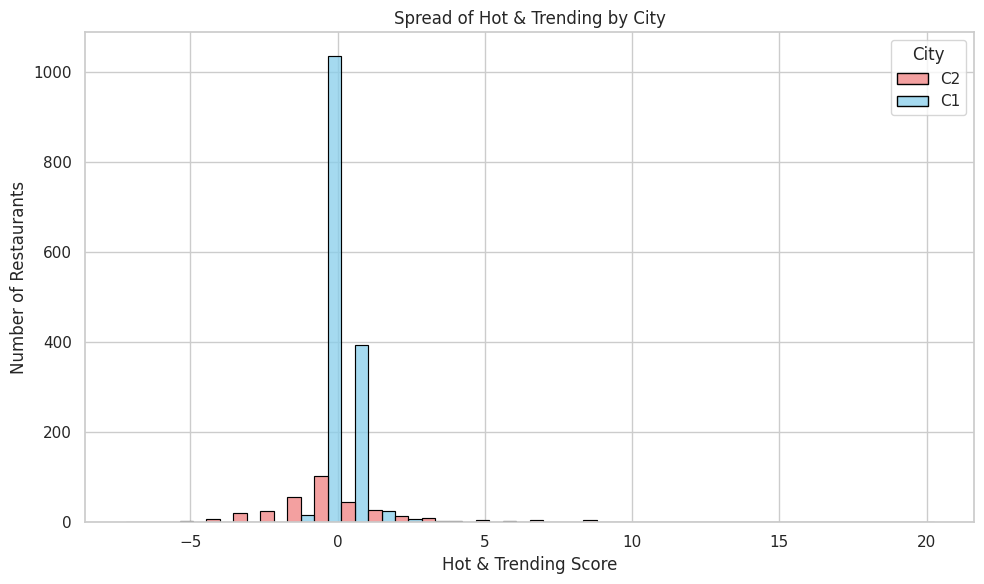

In [ ]:
# Plot side-by-side histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=scored_df,
    x='final_trending_score',
    hue='City',
    multiple='dodge',
    bins=30,
    palette={'C1': 'skyblue', 'C2': 'lightcoral'},
    edgecolor='black'
)

plt.title('Spread of Hot & Trending by City')
plt.xlabel('Hot & Trending Score')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.tight_layout()
plt.show()


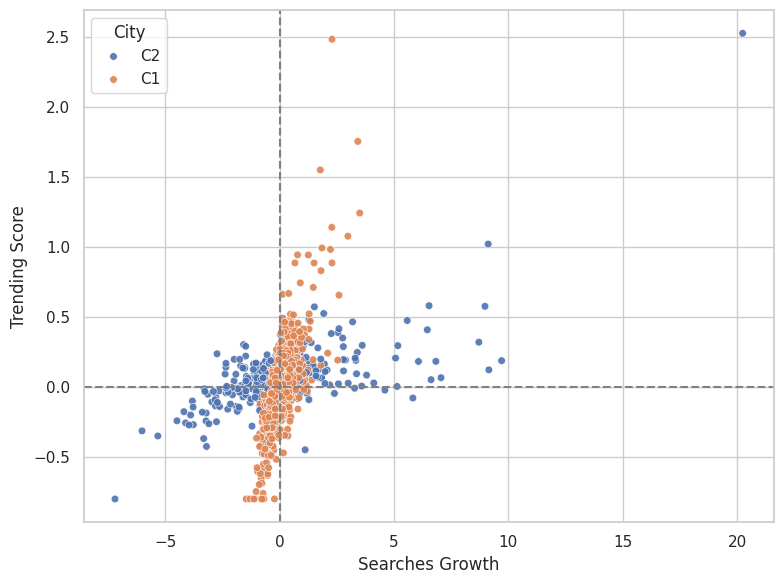

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=scored_df,
    x="final_trending_score", y="reservations_adjusted_growth",
    hue="City", # Color by City
    s=30,
    alpha=0.9
)

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

plt.title("", fontsize=14, weight="bold")
plt.xlabel("Searches Growth")
plt.ylabel("Trending Score")
plt.legend(title="City")
plt.tight_layout()
plt.show()

In [ ]:
scored_df["final_trending_score"].describe()

,final_trending_score
count,1.815000e+03
mean,2.348902e-17
std,1.170610e+00
min,-7.193619e+00
25%,-3.216584e-01
50%,-8.451122e-02
75%,1.997117e-01
max,2.023701e+01


## Validation

In [ ]:
# Validation thresholds
VALIDATION_THRESHOLDS = {
    'min_effect_size': 0.2,           # 20% change threshold
    'max_extreme_score': 10.0,
    'min_reservation_decline': -0.1
}

def statistical_validation(results):
    """Validate statistical significance of top tier restaurants."""
    tier1_restaurants = results[results['trending_tier'] == "Tier 1 - Feature Prominently"]

    stat_validation = []
    for _, restaurant in tier1_restaurants.iterrows():
        recent = restaurant['reservations_recent_capped']
        baseline = restaurant['reservations_baseline_capped']

        if baseline > 0:
            effect_size = (recent - baseline) / baseline
            is_significant = abs(effect_size) > VALIDATION_THRESHOLDS['min_effect_size']

            stat_validation.append({
                'restaurant_id': restaurant['Rid'],
                'city': restaurant['City'],
                'effect_size': effect_size,
                'statistically_significant': is_significant,
                'final_score': restaurant['final_trending_score']
            })

    return pd.DataFrame(stat_validation)

def business_logic_validation(results):
    """Check for business logic issues that need review."""
    business_flags = []

    # Flag extreme scores for manual review
    extreme_scores = results[results['final_trending_score'] > VALIDATION_THRESHOLDS['max_extreme_score']]
    if len(extreme_scores) > 0:
        business_flags.append(f"REVIEW NEEDED: {len(extreme_scores)} restaurants with extreme trending scores")

    # Flag mixed signals (high score but declining core metrics)
    mixed_signals = results[
        (results['final_trending_score'] > 1) &
        (results['reservations_adjusted_growth'] < VALIDATION_THRESHOLDS['min_reservation_decline'])
    ]
    if len(mixed_signals) > 0:
        business_flags.append(f"QUALITY WARNING: {len(mixed_signals)} restaurants trending despite reservation decline")

    return business_flags

def data_quality_assessment(processed_df, results):
    """Assess overall data quality and completeness."""
    tier1_restaurants = results[results['trending_tier'] == "Tier 1 - Feature Prominently"]

    data_quality = {
        'total_analyzed': len(processed_df),
        'viable_restaurants': len(results),
        'tier1_count': len(tier1_restaurants),
        'avg_data_completeness': results['has_core_data'].mean() if 'has_core_data' in results.columns else float('nan'),
        'score_distribution': {
            'mean': results['final_trending_score'].mean(),
            'std': results['final_trending_score'].std(),
            'min': results['final_trending_score'].min(),
            'max': results['final_trending_score'].max()
        }
    }

    return data_quality

def validate_results(processed_df, results):
    """Run complete validation suite."""
    print("Results Validation")

    validation_report = {}

    # Statistical validation
    validation_report['statistical'] = statistical_validation(results)

    # Business logic validation
    validation_report['business_flags'] = business_logic_validation(results)

    # Data quality assessment
    validation_report['data_quality'] = data_quality_assessment(processed_df, results)

    print("   Statistical validation completed")
    print("   Business logic checks completed")
    print("   Data quality assessment completed")

    if validation_report['business_flags']:
        print("Validation Flags:")
        for flag in validation_report['business_flags']:
            print(f"      • {flag}")

    return validation_report

def print_validation_summary(validation_report):
    """Print detailed validation summary."""
    print("\nVALIDATION SUMMARY")
    print("="*40)

    # Data quality metrics
    dq = validation_report.get('data_quality', {})
    if dq:
        print(f"Data Quality:")
        print(f"  • Total analyzed: {dq.get('total_analyzed', 'N/A')}")
        print(f"  • Viable restaurants: {dq.get('viable_restaurants', 'N/A')}")
        print(f"  • Tier 1 count: {dq.get('tier1_count', 'N/A')}")
        avg_data_completeness = dq.get('avg_data_completeness', None)
        if avg_data_completeness is not None and not pd.isna(avg_data_completeness):
            print(f"  • Data completeness: {avg_data_completeness:.1%}")
        else:
            print(f"  • Data completeness: N/A")

    # Statistical validation
    stat_df = validation_report.get('statistical', pd.DataFrame())
    if not stat_df.empty:
        significant_count = stat_df['statistically_significant'].sum()
        print(f"\nStatistical Validation:")
        print(f"  • Tier 1 restaurants: {len(stat_df)}")
        print(f"  • Statistically significant: {significant_count}/{len(stat_df)}")

    # Business flags
    flags = validation_report.get('business_flags', [])
    if flags:
        print(f"\nBusiness Flags:")
        for flag in flags:
            print(f"  • {flag}")
    else:
        print(f"\nNo business logic issues identified")

report = validate_results(scored_df, hot_trending_df)
print_validation_summary(report)


Results Validation
   Statistical validation completed
   Business logic checks completed
   Data quality assessment completed
Validation Flags:
      • REVIEW NEEDED: 1 restaurants with extreme trending scores

VALIDATION SUMMARY
Data Quality:
  • Total analyzed: 2642
  • Viable restaurants: 30
  • Tier 1 count: 6
  • Data completeness: 100.0%

Statistical Validation:
  • Tier 1 restaurants: 6
  • Statistically significant: 5/6

Business Flags:
  • REVIEW NEEDED: 1 restaurants with extreme trending scores


In [ ]:
hot_trending_df.to_csv('hot_trending.csv')

In [ ]:
scored_df.to_csv('scored.csv')

In [ ]:
scored_df

,Rid,City,reservations_recent,reviews_recent,searches_recent,alerts_recent,saves_recent,reservations_baseline,reviews_baseline,searches_baseline,alerts_baseline,saves_baseline,has_core_data,reservations_recent_capped,reservations_baseline_capped,reviews_recent_capped,reviews_baseline_capped,searches_recent_capped,searches_baseline_capped,alerts_recent_capped,alerts_baseline_capped,saves_recent_capped,saves_baseline_capped,reservations_growth,reservations_adjusted_growth,reviews_growth,reviews_adjusted_growth,searches_growth,searches_adjusted_growth,alerts_growth,alerts_adjusted_growth,saves_growth,saves_adjusted_growth,composite_score,market_adjusted_score,final_trending_score
0,10001440,C2,1,NaN,36.0,0.0,1.0,91.0,5.0,153.0,1.0,2.0,False,1.0,91.0,NaN,5.0,36.0,153.0,1.0,1.0,1.0,2.0,-0.800000,-0.340187,NaN,NaN,-0.764706,-0.515419,0.0,0.0,-0.5,-0.166667,NaN,NaN,NaN
1,1001130,C1,182,2.0,15.0,0.0,2.0,230.0,5.0,36.0,0.0,0.0,True,182.0,230.0,2.0,5.0,15.0,36.0,1.0,1.0,2.0,1.0,-0.208696,-0.208696,-0.600000,-0.600000,-0.583333,-0.350000,0.0,0.0,1.0,0.500000,-0.221772,-0.542547,-0.542547
2,1001700,C1,70,3.0,36.0,0.0,2.0,103.0,7.0,39.0,0.0,1.0,True,70.0,103.0,3.0,7.0,36.0,39.0,1.0,1.0,2.0,1.0,-0.320388,-0.317308,-0.571429,-0.571429,-0.076923,-0.050000,0.0,0.0,1.0,0.500000,-0.194402,-0.483221,-0.483221
3,1002190,C2,81,5.0,53.0,0.0,1.0,70.0,7.0,68.0,0.0,5.0,True,81.0,70.0,5.0,7.0,53.0,68.0,1.0,1.0,1.0,5.0,0.157143,0.051402,-0.285714,-0.133333,-0.220588,-0.066079,0.0,0.0,-0.8,-0.666667,-0.055703,-1.235153,-1.235153
4,1002240,C1,102,2.0,6.0,0.0,3.0,111.0,NaN,20.0,0.0,1.0,False,102.0,111.0,2.0,NaN,6.0,20.0,1.0,1.0,3.0,1.0,-0.081081,-0.081081,NaN,NaN,-0.700000,-0.233333,0.0,0.0,2.0,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,997170,C1,125,NaN,57.0,1.0,1.0,155.0,2.0,60.0,0.0,1.0,False,125.0,155.0,NaN,2.0,57.0,60.0,1.0,1.0,1.0,1.0,-0.193548,-0.193548,NaN,NaN,-0.050000,-0.050000,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
2638,997920,C1,89,3.0,26.0,0.0,2.0,87.0,NaN,27.0,0.0,1.0,False,89.0,87.0,3.0,NaN,26.0,27.0,1.0,1.0,2.0,1.0,0.022989,0.019231,NaN,NaN,-0.037037,-0.016667,0.0,0.0,1.0,0.500000,NaN,NaN,NaN
2639,998730,C1,476,10.0,192.0,0.0,8.0,496.0,12.0,112.0,0.0,4.0,True,476.0,496.0,10.0,12.0,192.0,112.0,1.0,1.0,8.0,4.0,-0.040323,-0.040323,-0.166667,-0.166667,0.714286,0.714286,0.0,0.0,1.0,1.000000,0.166884,0.299901,0.299901
2640,999600,C1,191,NaN,40.0,0.0,0.0,126.0,NaN,32.0,0.0,1.0,False,191.0,126.0,NaN,NaN,40.0,32.0,1.0,1.0,1.0,1.0,0.515873,0.515873,NaN,NaN,0.250000,0.133333,0.0,0.0,0.0,0.000000,NaN,NaN,NaN


/tmp/ipython-input-3404992005.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_bucket_counts = scored_df_viz.groupby(['City', 'score_bucket']).size().reset_index(name='Number of Restaurants')
/tmp/ipython-input-3404992005.py:28: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  score_bucket_counts = score_bucket_counts.set_index(['City', 'score_bucket']).unstack(fill_value=0).stack().reset_index()


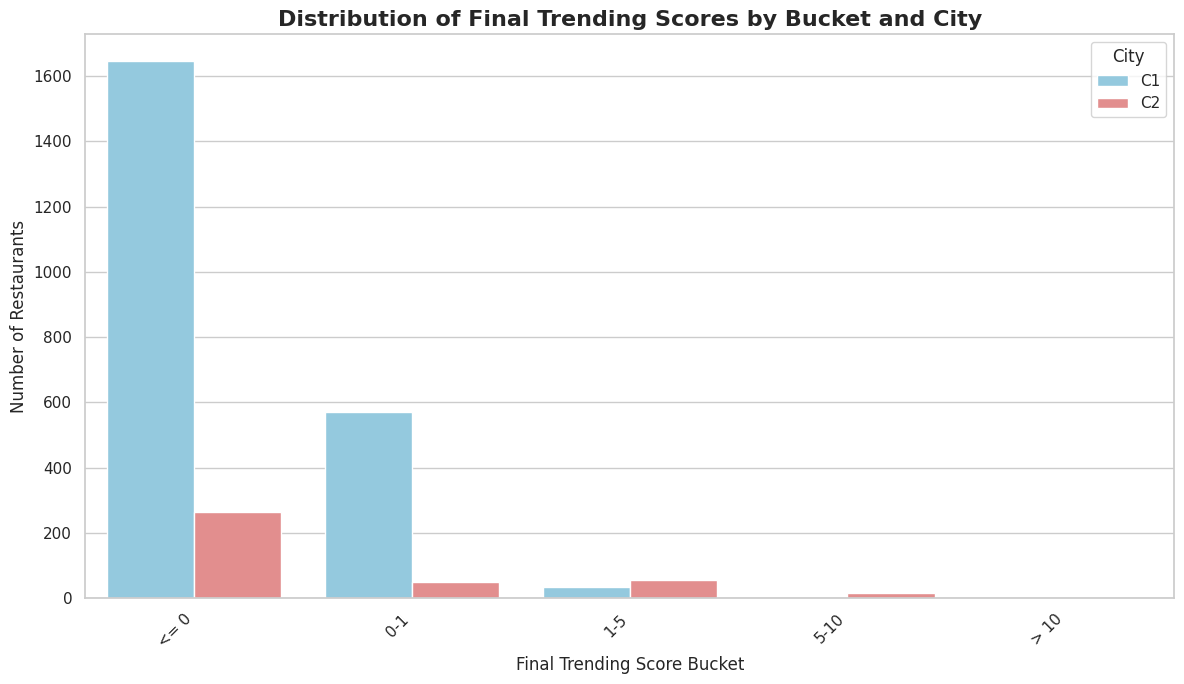

In [ ]:
# Define score buckets
score_bins = [-np.inf, 0, 1, 5, 10, np.inf]
score_labels = ['<= 0', '0-1', '1-5', '5-10', '> 10']

scored_df_viz = scored_df.copy()

# Handle potential NaN values in final_trending_score before cutting
scored_df_viz['final_trending_score_filled'] = scored_df_viz['final_trending_score'].fillna(0)


# Create the score buckets
scored_df_viz['score_bucket'] = pd.cut(
    scored_df_viz['final_trending_score_filled'],
    bins=score_bins,
    labels=score_labels,
    right=True,
    include_lowest=True
)

# Count the number of restaurants in each bucket per city
score_bucket_counts = scored_df_viz.groupby(['City', 'score_bucket']).size().reset_index(name='Number of Restaurants')

all_cities = scored_df_viz['City'].unique()
all_buckets = pd.CategoricalDtype(categories=score_labels, ordered=True)

score_bucket_counts['score_bucket'] = score_bucket_counts['score_bucket'].astype(all_buckets)

score_bucket_counts = score_bucket_counts.set_index(['City', 'score_bucket']).unstack(fill_value=0).stack().reset_index()
score_bucket_counts.columns = ['City', 'score_bucket', 'Number of Restaurants']


# Plot the distribution of score buckets by city
plt.figure(figsize=(12, 7))
sns.barplot(
    data=score_bucket_counts,
    x='score_bucket',
    y='Number of Restaurants',
    hue='City',
    palette={'C1': 'skyblue', 'C2': 'lightcoral'},
    order=score_labels )

plt.title("Distribution of Final Trending Scores by Bucket and City", fontsize=16, weight="bold")
plt.xlabel("Final Trending Score Bucket")
plt.ylabel("Number of Restaurants")
plt.legend(title="City")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

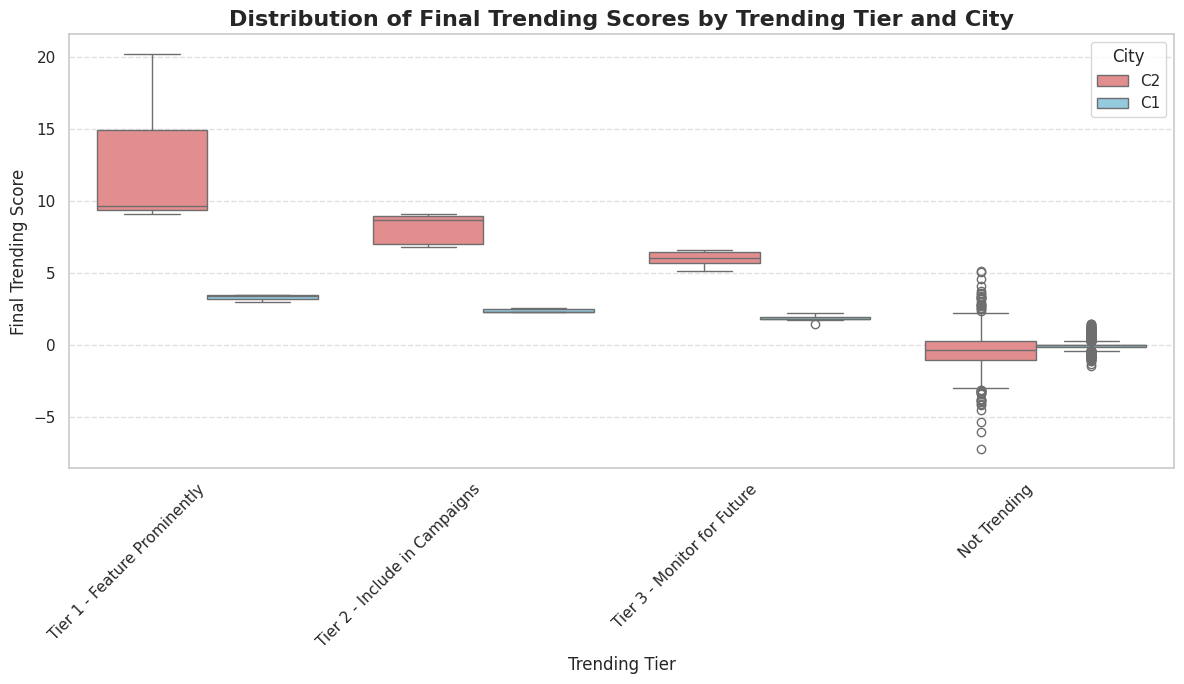

In [ ]:

plot_df = scored_df.copy()
if 'trending_tier' not in plot_df.columns:
    # Merge with hot_trending_df to get the tier information
    plot_df = pd.merge(plot_df, hot_trending_df[['Rid', 'trending_tier']], on='Rid', how='left')
    # Fill non-trending restaurants with 'Not Trending' tier
    plot_df['trending_tier'] = plot_df['trending_tier'].fillna('Not Trending')

# Handle potential NaNs in final_trending_score before plotting
plot_df['final_trending_score'] = plot_df['final_trending_score'].fillna(0)

# Define tier order for consistent plotting
tier_order = ["Tier 1 - Feature Prominently", "Tier 2 - Include in Campaigns", "Tier 3 - Monitor for Future", "Not Trending"]
plot_df['trending_tier'] = pd.Categorical(plot_df['trending_tier'], categories=tier_order, ordered=True)

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=plot_df,
    x='trending_tier',
    y='final_trending_score',
    hue='City',
    order=tier_order,
    palette={'C1': 'skyblue', 'C2': 'lightcoral'}
)

plt.title("Distribution of Final Trending Scores by Trending Tier and City", fontsize=16, weight="bold")
plt.xlabel("Trending Tier")
plt.ylabel("Final Trending Score")
plt.xticks(rotation=45, ha='right')
plt.legend(title="City")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

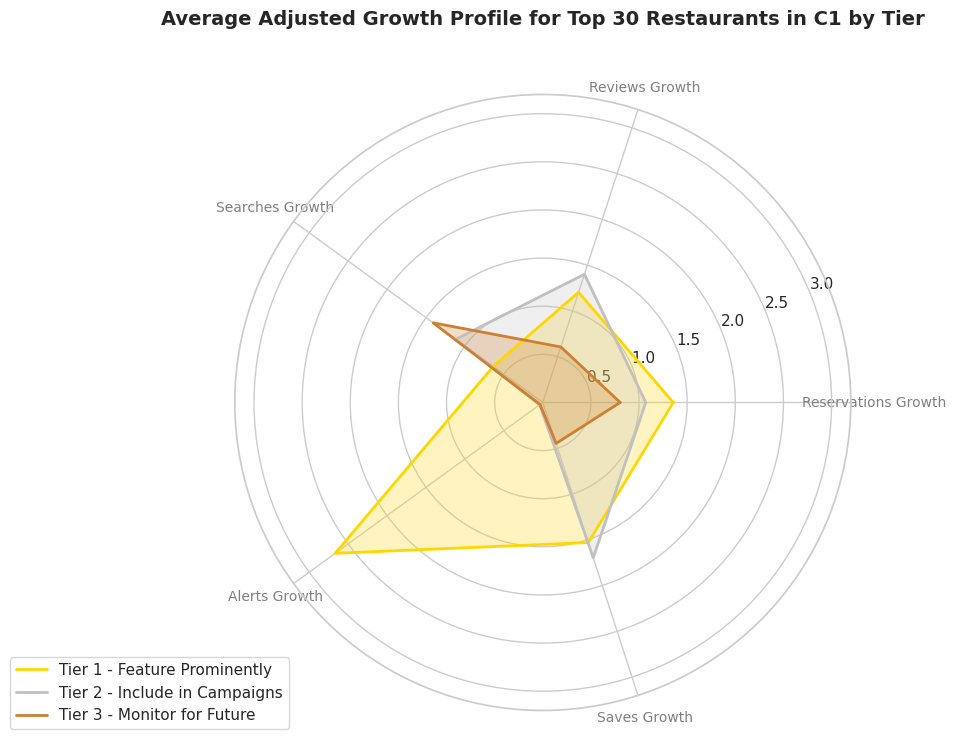

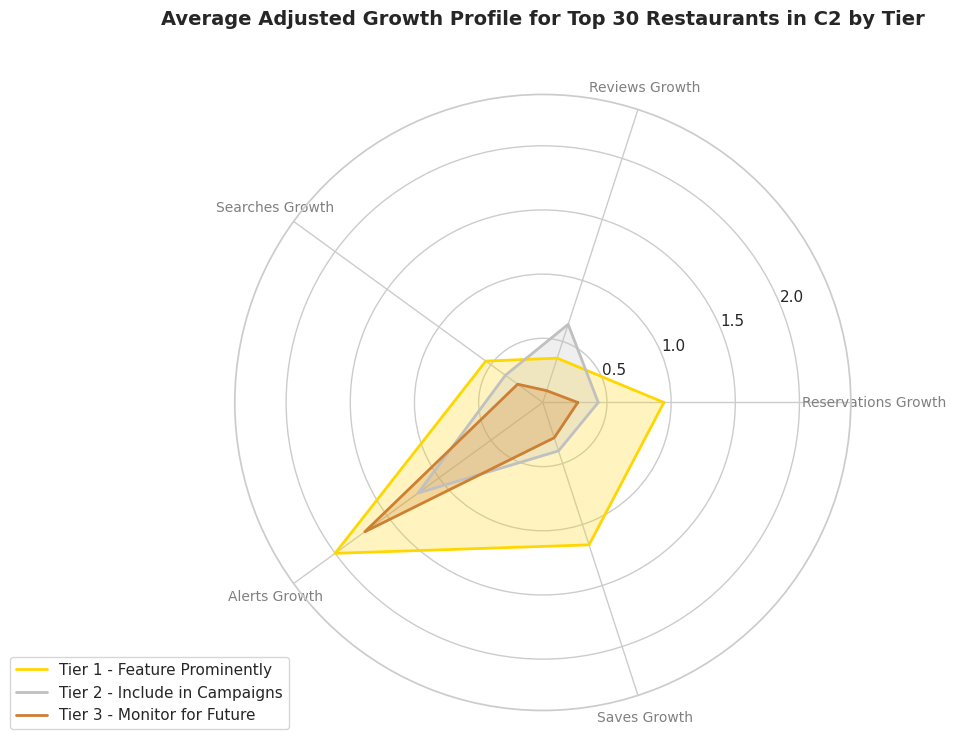

In [ ]:

# Define the metrics for the radar chart (using adjusted growth)
metrics_for_radar = [
    'reservations_adjusted_growth',
    'reviews_adjusted_growth',
    'searches_adjusted_growth',
    'alerts_adjusted_growth',
    'saves_adjusted_growth'
]

# Define labels for the radar chart axes
radar_labels = ["Reservations Growth", "Reviews Growth", "Searches Growth", "Alerts Growth", "Saves Growth"]

# Define colors for the tiers
tier_colors = {
    "Tier 1 - Feature Prominently": "#FFD700",  # Gold
    "Tier 2 - Include in Campaigns": "#C0C0C0",  # Silver
    "Tier 3 - Monitor for Future": "#CD7F32"     # Bronze
}

# Filter the top_per_city DataFrame to include only the trending tiers
trending_top_per_city = top_per_city[top_per_city['trending_tier'] != 'Not Trending'].copy()

# Group by City and Tier and calculate the mean of the adjusted growth metrics
radar_data = trending_top_per_city.groupby(['City', 'trending_tier'])[metrics_for_radar].mean().reset_index()

# Iterate through each city to create a radar chart
for city in trending_top_per_city['City'].unique():
    city_data = radar_data[radar_data['City'] == city]

    # Create a dummy DataFrame with all tiers for this city
    all_tiers_city = pd.DataFrame({
        'City': city,
        'trending_tier': [tier for tier in tier_colors.keys()]
    })
    # Merge with actual data, filling missing metric values with 0
    city_data = pd.merge(all_tiers_city, city_data, on=['City', 'trending_tier'], how='left').fillna(0)


    # Set the order of tiers for plotting
    city_data['trending_tier'] = pd.Categorical(city_data['trending_tier'], categories=tier_colors.keys(), ordered=True)
    city_data = city_data.sort_values('trending_tier')


    # Prepare data for the radar chart
    tier_values = {}
    for index, row in city_data.iterrows():
        tier = row['trending_tier']
        values = [row[metric] for metric in metrics_for_radar]
        values += values[:1]
        tier_values[tier] = values

    angles = [n / float(len(metrics_for_radar)) * 2 * pi for n in range(len(metrics_for_radar))]
    angles += angles[:1]

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], radar_labels, color="grey", size=10)

    # Set y-axis limits - find the max value across all metrics and tiers for this city
    max_value = city_data[metrics_for_radar].values.max()
    ax.set_ylim(0, max(max_value * 1.2, 0.5))

    # Plot each tier
    for tier, values in tier_values.items():
        if tier in tier_colors:
             ax.plot(angles, values, linewidth=2, linestyle='solid', label=tier, color=tier_colors[tier])
             ax.fill(angles, values, color=tier_colors[tier], alpha=0.25)


    plt.title(f"Average Adjusted Growth Profile for Top 30 Restaurants in {city} by Tier", size=14, weight='bold', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

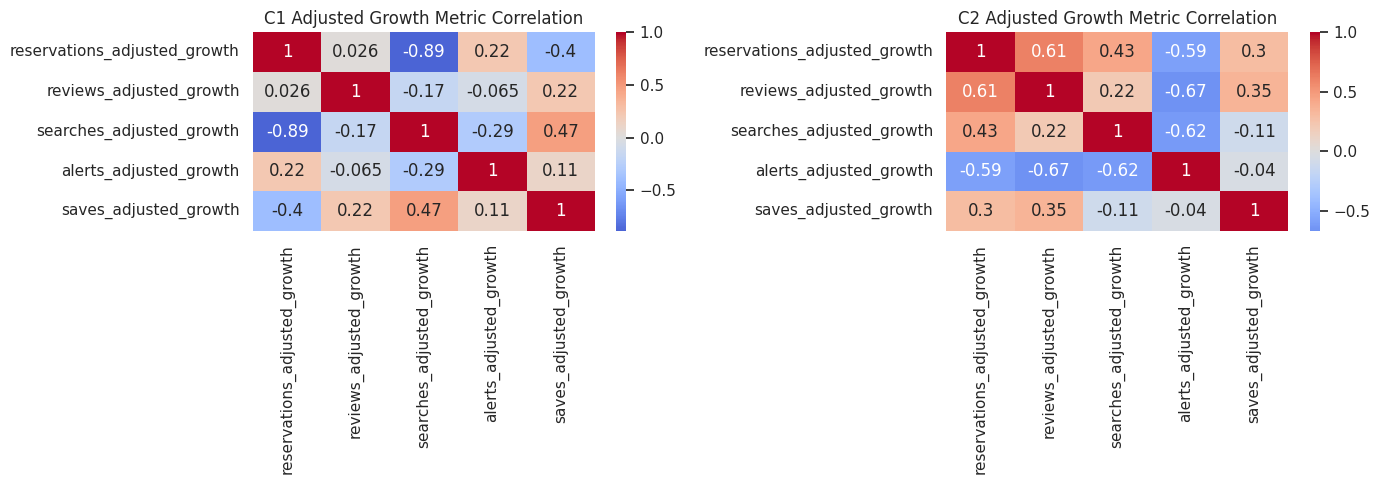

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the adjusted growth metrics
adjusted_growth_metrics = [
    'reservations_adjusted_growth',
    'reviews_adjusted_growth',
    'searches_adjusted_growth',
    'alerts_adjusted_growth',
    'saves_adjusted_growth'
]

# Prepare data for correlation analysis, selecting only the adjusted growth metrics
# Also drop rows with NaN values in these specific columns for correlation calculation
corr_data_c1 = hot_trending_df[hot_trending_df["City"] == "C1"][adjusted_growth_metrics].dropna().corr()
corr_data_c2 = hot_trending_df[hot_trending_df["City"] == "C2"][adjusted_growth_metrics].dropna().corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(corr_data_c1, annot=True, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("C1 Adjusted Growth Metric Correlation")

sns.heatmap(corr_data_c2, annot=True, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("C2 Adjusted Growth Metric Correlation")

plt.tight_layout()
plt.show()

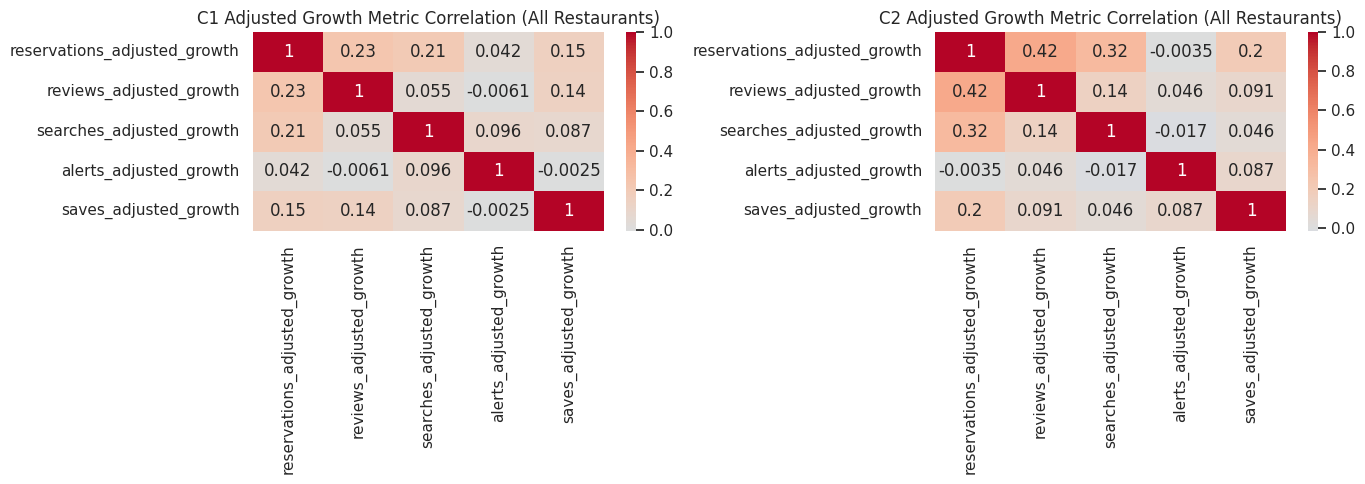

In [ ]:
# Define the adjusted growth metrics
adjusted_growth_metrics = [
    'reservations_adjusted_growth',
    'reviews_adjusted_growth',
    'searches_adjusted_growth',
    'alerts_adjusted_growth',
    'saves_adjusted_growth'
]

# Prepare data for correlation analysis using the entire scored_df
# Select only the adjusted growth metrics and drop rows with NaN values
corr_data_c1_all = scored_df[scored_df["City"] == "C1"][adjusted_growth_metrics].dropna().corr()
corr_data_c2_all = scored_df[scored_df["City"] == "C2"][adjusted_growth_metrics].dropna().corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(corr_data_c1_all, annot=True, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("C1 Adjusted Growth Metric Correlation (All Restaurants)")

sns.heatmap(corr_data_c2_all, annot=True, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("C2 Adjusted Growth Metric Correlation (All Restaurants)")

plt.tight_layout()
plt.show()

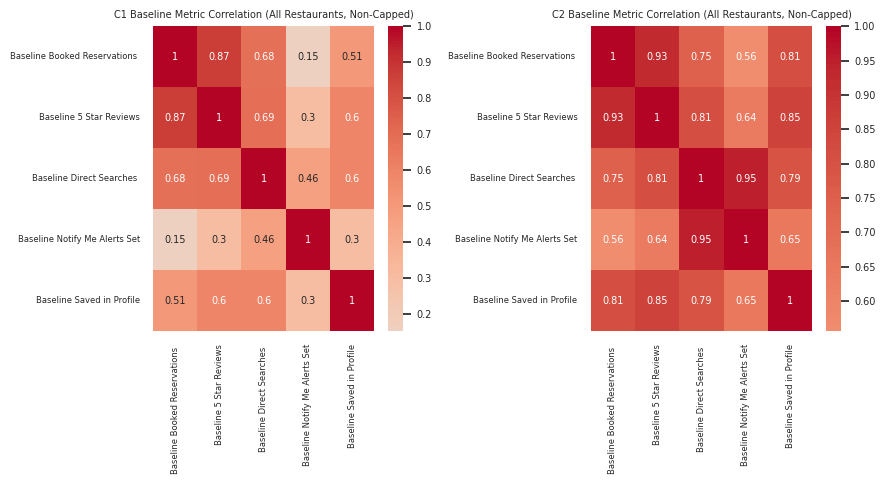

In [ ]:
# Define the baseline metrics
baseline_metrics = [
    'Baseline Booked Reservations ',
    'Baseline 5 Star Reviews',
    'Baseline Direct Searches ',
    'Baseline Notify Me Alerts Set',
    'Baseline Saved in Profile'
]

# Prepare data for correlation analysis using the entire df
# Select only the baseline metrics and drop rows with NaN values
corr_data_c1_baseline = df[df["City"] == "C1"][baseline_metrics].dropna().corr()
corr_data_c2_baseline = df[df["City"] == "C2"][baseline_metrics].dropna().corr()

fig, axes = plt.subplots(1, 2, figsize=(9, 5))
sns.heatmap(corr_data_c1_baseline, annot=True, cmap="coolwarm", center=0, ax=axes[0], annot_kws={"size": 7})
axes[0].set_title("C1 Baseline Metric Correlation (All Restaurants, Non-Capped)", fontsize=7)
axes[0].tick_params(axis='both', which='major', labelsize=6)


sns.heatmap(corr_data_c2_baseline, annot=True, cmap="coolwarm", center=0, ax=axes[1], annot_kws={"size": 7})
axes[1].set_title("C2 Baseline Metric Correlation (All Restaurants, Non-Capped)", fontsize=7, )
axes[1].tick_params(axis='both', which='major', labelsize=6)

cbar = axes[0].collections[0].colorbar
cbar.ax.tick_params(labelsize=7)
cbar = axes[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=7)


plt.tight_layout()
plt.show()

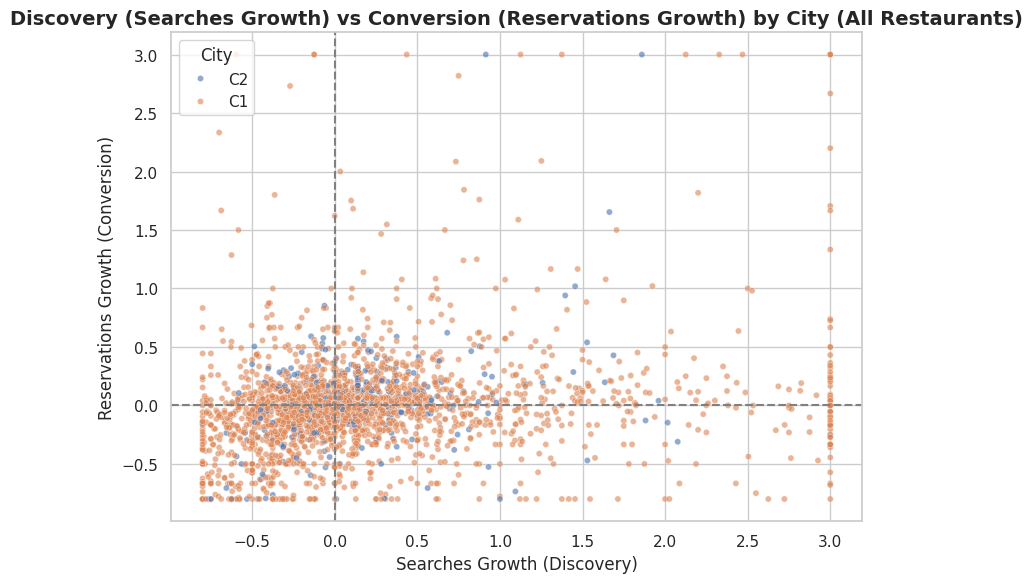

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=scored_df,
    x="searches_growth", y="reservations_growth",
    hue="City", # Color by City
    s=20,
    alpha=0.6
)

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

plt.title("Discovery (Searches Growth) vs Conversion (Reservations Growth) by City (All Restaurants)", fontsize=14, weight="bold")
plt.xlabel("Searches Growth (Discovery)")
plt.ylabel("Reservations Growth (Conversion)")
plt.legend(title="City")
plt.tight_layout()
plt.show()

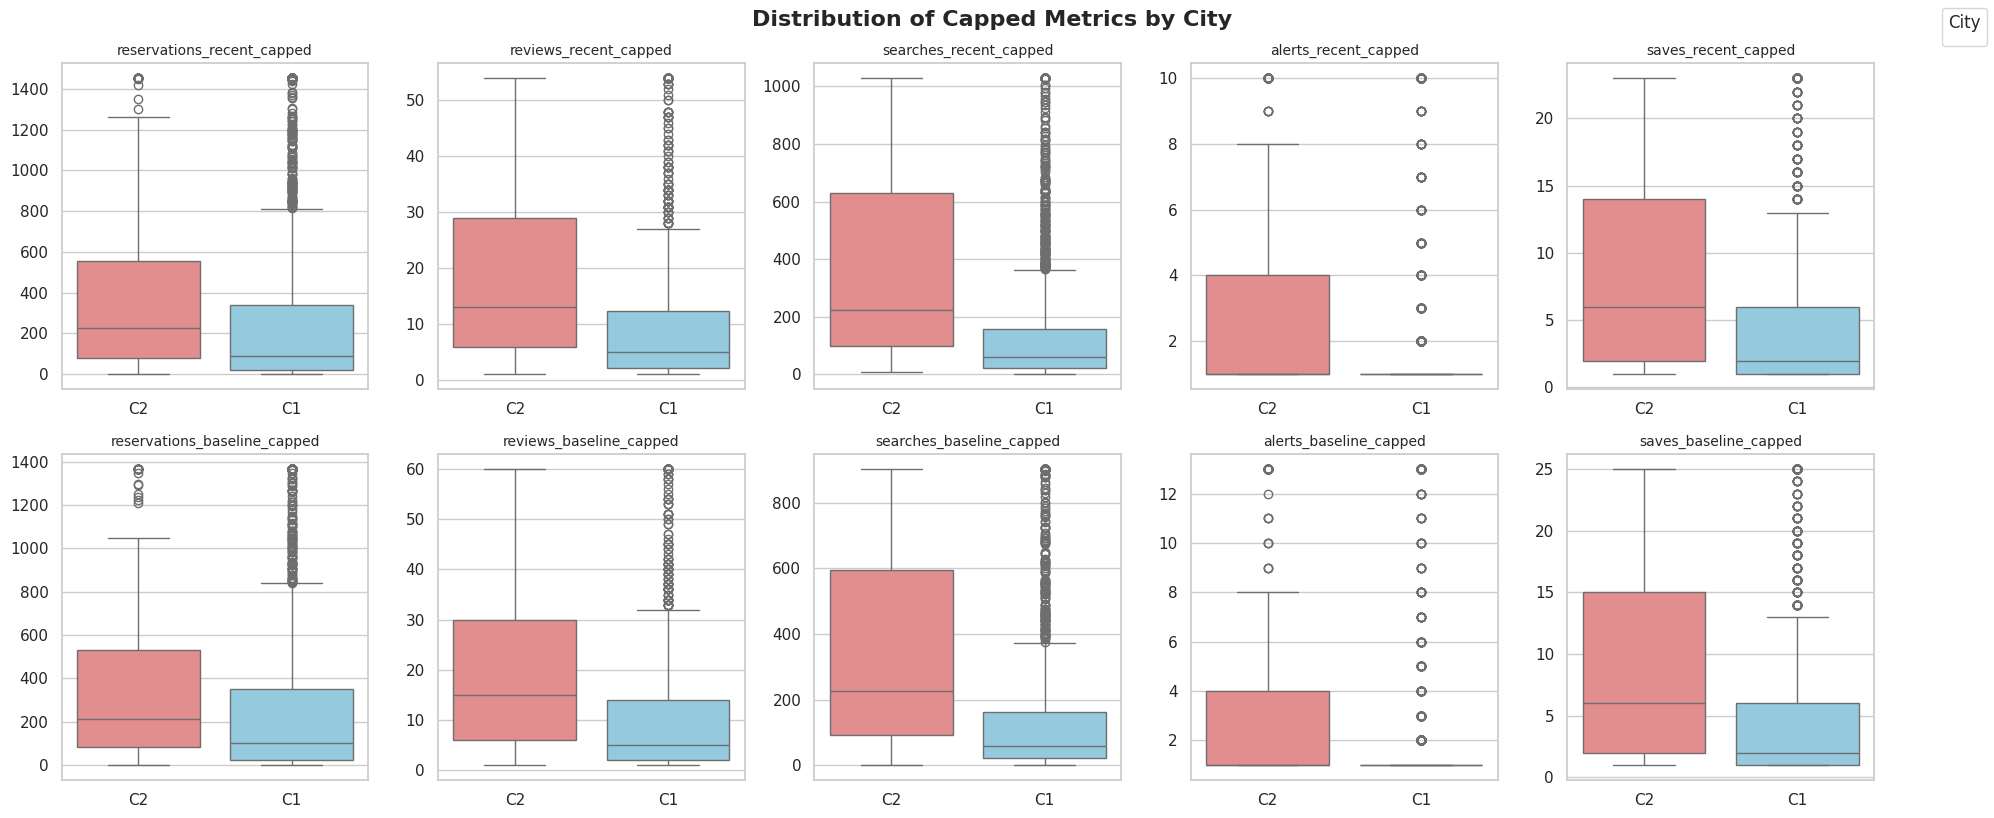

In [ ]:
# Define the capped metrics
capped_metrics = [
    'reservations_recent_capped',
    'reviews_recent_capped',
    'searches_recent_capped',
    'alerts_recent_capped',
    'saves_recent_capped',
    'reservations_baseline_capped',
    'reviews_baseline_capped',
    'searches_baseline_capped',
    'alerts_baseline_capped',
    'saves_baseline_capped'
]

# Create subplots for each metric
n_metrics = len(capped_metrics)
# Determine grid size (e.g., 2 rows, 5 columns)
n_cols = 5
n_rows = (n_metrics + n_cols - 1) // n_cols # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

# Plot each metric by city
for i, metric in enumerate(capped_metrics):
    if metric in scored_df.columns and 'City' in scored_df.columns:
        sns.boxplot(y=scored_df[metric], x=scored_df['City'], ax=axes[i], hue=scored_df['City'], palette={'C1': 'skyblue', 'C2': 'lightcoral'}, dodge=False) # Use boxplot, add x='City' and hue='City'
        axes[i].set_title(metric, fontsize=10)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")

        axes[i].legend([],[], frameon=False)
        if i == 0:
             handles, labels = axes[i].get_legend_handles_labels()
             fig.legend(handles, labels, loc='upper right', title="City")

    else:
        axes[i].set_title(f"{metric}\n(Not Found)", fontsize=10)
        axes[i].axis('off')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.suptitle("Distribution of Capped Metrics by City", y=1.02, fontsize=16, weight='bold')
plt.show()